# MTH9879 Homework 2

Assigned: February 10, 2015.
Due: February 24, 2015 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Yu Gan (yugan323@gmail.com), Fubo Shi (fubo.shi.baruch@gmail.com), and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your TAs Yu Gan and/or Fubo Shi.


### 0. (0 points) 

Read Chapter 12 of Hasbrouck and Section 6.4 of Foucault, Pagano and R&ouml;ell.


## The Parlour (1998) model

### 1. (10 points) 
Consider the first step $t = 1$ of the 3-step order book case presented in the lecture slides. Suppose that the order book at (or just before) $t = 1$ has one share offered and one share bid ($n_B = n_A = 1$).

Give the probabilities as of a market buy, market sell, limit buy and limit sell at $t = 1$,
You may use my Mathematica notebook *Parlour.nb* as a guide (if you wish).

#### Solution:

The probability of a limit buy order at $t=1$ being filled is $\PP = \frac{5}{22} \times \frac{5}{22}=\frac{25}{484}.$

Traders will submit a MS only if
$B - \beta_t\,V \geq (A - \beta_t\,V) \,\PP$ or
equivalently

$$\beta_1 \leq \frac{B-A\,\PP}{V\,(1-\PP)} = \frac{B-A\,\PP}{V\,(1-\PP)} =\frac{4540}{5049}.$$

Thus,
\begin{eqnarray*}
{\mathbb{P} }_{MB}&=&{\mathbb{P} }_{MS}=\frac{1}{2}{\mathbb{P} }\left(\beta_1<\frac{4540}{5049}\right)=\frac{1135}{5049}\\
{\mathbb{P} }_{LB}&=&{\mathbb{P} }_{LS}=\frac{1}{2}{\mathbb{P} }\left(\frac{4540}{5049}<\beta_1<\frac{12}{11}\right)=\frac{22}{459}\\
{\mathbb{P} }_{0}&=&1-2{\mathbb{P} }_{MB}-2{\mathbb{P} }_{LB}=1-\frac{2270}{5049}-\frac{44}{459}=\frac{5}{11}.\end{eqnarray*}

### 2. (4 points) 
Explain why the optimal market/limit order decision depends in general on quantity available on both sides of the order book in the Parlour model.

#### Solution:
The probability of the Limit Order Probability depends on the order book for the next time step, which is related to the quantitity available on both sides. And the market order probability depends on the probability of Limit order
    

### Set up R-environment

In [2]:
%load_ext rmagic

In [3]:
%%R
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")
source("ziSetup.R")

trying URL 'http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip'
Content type 'application/zip' length 1485 bytes
opened URL
downloaded 1485 bytes



## Cont-Kukanov optimal order placement

### 3. (16 points)

Consider the two BATS exchanges BZX and BYX.  Suppose you are trying to buy shares of MSFT in 3.9 minutes ($1\%$ of the trading day).  Suppose further that the two exchanges have the following characteristics:

**Exchange** | **Make fee** | **Take fee** | **Daily volume** 
-----|-----:|-------:| ---- |
| **(per share)** | **(per share)** | **(shares)** 
BZX | -0.32¢ | +0.30¢ | 10,500,000
BYX | +0.03¢ | -0.03¢ | 1,300,000

Assume the daily volatility of MSFT is $1\%$ and that MSFT is trading at $\$37.50$.

(a) We may suppose that if your order is only partially filled, that's because the price moved away (*adverse selection*).  This suggests that we penalize any under fill of limit orders by $\sigma\,\sqrt{T}$ where $T$ is the order duration.  Compute the corresponding value of $\lambda_u$ in cents per share.


(b) Assuming a spread of $1$ cent, what are $h$, $f$, and $r$ for BZX and BYX respectively (in cents per share)?


(c) Assuming no seasonality, what is the mean value $\bar \xi$ of $\xi$ (over 3.9 minutes) for BZX and BYX respectively (in shares)?


(d)  Assume that $\xi$ is log normally distributed with

$$
\xi = \bar \xi \,\exp\left\{\sigma\,Z-\frac 12\,\sigma^2\right\}.
$$

where $Z \sim N(0,1)$ and $\sigma = 1/2$.  What is the standard deviation of $\xi$ (in terms of $\bar \xi$)?


(e) Write R-code to determine the optimal order size $L^\star+Q$ on BZX and BYX respectively. Assume here that you will either trade on BZX or BYX; there is no splitting of the order between the two exchanges. <br>
(Hint: You may find the R function *qnorm(. )* useful).


(f) Compare the optimal limit order sizes from part (e) with the ratios of quote sizes and volumes on BZX and BYX.  Are your results from part (e) roughly consistent with observation.  You may assume that the quote sizes shown on the MSFT BATS slides from Lecture 1 are typical.

#### Solution:

(a)$\ \lambda_u = \sigma\,\sqrt{T} = 1\% \times 37.50 \times \sqrt{1\%} \times 100 = 3.75\ $  

(b)
For BZX: $h=0.5$, $f=0.3$, $r=-0.32$. 
For BYX: $h=0.5$, $f=-0.03$, $r=0.03$.

(c)
For BZX: $\bar \xi = 1\% \times 10500000 = 105000$. 
For BYX: $\bar \xi = 1\% \times 1300000 = 13000$.

(d) Since $Z \sim N(0,1)$ and $\sigma = 1/2$, then $\sigma\,Z-\frac 12\,\sigma^2 \sim N(-0.125,0.25)$. Thus the standard deviation of $\xi$ is $\bar\xi\sqrt{e^\frac 14 - 1} \approx 0.5329\ \bar\xi$

In [4]:
%%R
lamda <- 3.75
h <- 0.5
r <- 0.32
f <- 0.3
xi <- 1050000
sigma <- 0.5
tmp <- (2 * h + f + r) / (lamda + h + r)
op_order <- qnorm(tmp)
op_order <- xi * exp(op_order * sigma - 0.5 * sigma * sigma)
print(op_order)

[1] 768873.6


In [5]:
%%R
lamda <- 3.75
h <- 0.5
r <- -0.03
f <- -0.03
xi <- 130000
sigma <- 0.5
tmp <- (2 * h + f + r) / (lamda + h + r)
op_order <- qnorm(tmp)
op_order <- xi * exp(op_order * sigma - 0.5 * sigma * sigma)
print(op_order)

[1] 78340.38


(f) Rather roughly consistent.

## The Bouchaud-M&eacute;zard-Potters order book approximation

### 4. (16 points)

When $\lambda(u)=\alpha$,  a constant, the BMP order density becomes

\begin{eqnarray*}
\rho_{BMP}(\Delta) &=& \frac{\alpha}{\delta}\,\left\{e^{-\Delta/{\tilde \Delta}}\,\int_0^{\Delta/{\tilde\Delta}}\,\sinh(u)\,du + \sinh(\Delta/{\tilde \Delta})\,\int_{\Delta/{\tilde\Delta}}^\infty\,e^{-u}\,du\right\} \\
&=&\frac{\alpha}{\delta}\,\left\{1 - e^{-\Delta/{\tilde \Delta}}  \right\}
\end{eqnarray*}

where the characteristic distance

$$
\tilde \Delta=\sqrt{\frac{\sigma^2}{2\,\delta}}.
$$

(a) Amend the SFGK zero intelligence code from Problem 3 of HW1 to count the number of limit orders generated in addition to computing the average book shape.

(b) With $\alpha = 1$, $\mu = 10$ and $\delta = \frac15$, simulate 100,000 events and plot the resulting average book shape in red (in a band $\pm 20$ around the mid price).

(c) From your simulation, what is the probability $P_L$ of a limit order at a given level conditional on an event? (Recall that there are 60 limit order levels in the simulation).

(d) In [Gatheral and Oomen]<sup id="cite_ref-GO" class="reference"><a href="#cite_note-GO"><span>[</span>1<span>]</span></a></sup>, with these SFGK parameters, realized variance per event was estimated as

$$
\sigma^2_{GO} = 0.083.
$$

Using your estimate $P_L$ of limit orders per level per event, convert this estimate to variance per limit order (recall that $\alpha=1$).  Denote your result by $\sigma^2_{GO}$.  Compute the characteristic distance $\tilde \Delta_{GO}$ with this estimate $\sigma^2_{GO}$.

(e) In Lecture 1, using dimensional analysis, we estimated that variance $\sigma^2_{DA}$ per unit time should be of the order of

$$
\sigma^2_{DA} = \frac{\mu\,\delta}{\alpha^2}.
$$

Compute the characteristic distance $\tilde \Delta_{DA}$ with this estimate $\sigma^2_{DA}$.

(f)  Using your two estimates of $\tilde \Delta$ from parts (d) and (e),  write functions to compute the corresponding order book densities $\rho_{GO}(\Delta)$ and $\rho_{DA}(\Delta)$.

(g)
Superimpose plots of the asymptotic densities $\rho_{DA}(\Delta)$ (in blue) and $\rho_{DA}(\Delta)$ (in orange) on your plot of the average book shape.

In [6]:
%%R

#Generate an event and update the buy and sell books
#Note that limit orders may be placed inside the spread
generateEvent_cos <- function()
    {
    nb <<- sum(book$buySize[book$Price>=(bestOffer()-L)]); # Number of cancelable buy orders
    ns <<- sum(book$sellSize[book$Price<=(bestBid()+L)]); # Number of cancelable sell orders
    eventRate <- nb*delta + ns*delta + mu + 2*L*alpha;
    probEvent <- c(L*alpha,L*alpha,nb*delta,ns*delta,mu/2,mu/2)/eventRate;
    m <- sample(1:6, 1, replace = TRUE, probEvent); #Choose event type
    switch(m,
    		limitBuyOrder(),
    		limitSellOrder(),
    		cancelBuyOrder(),
    		cancelSellOrder(),
    		marketBuyOrder(),
    		marketSellOrder()
    		);
    return (m)
    }

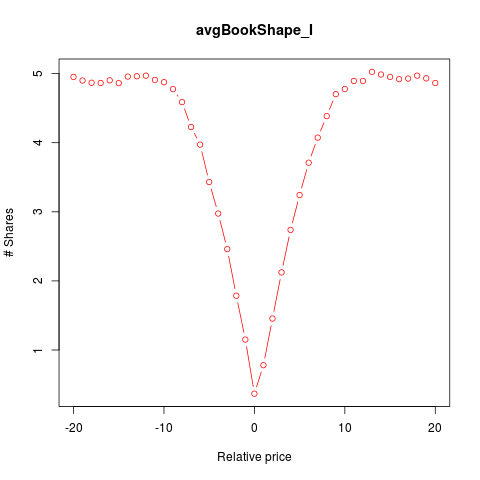

In [7]:
%%R
logging <- F # Very important for speed!

alpha <- 1
mu <- 10
delta <- 1/5 
initializeBook5()

count_limit_order=0
count_total=0
numEvents <- 100000 # Average over 100,000 events
avgBookShape_I <- bookShape(20)/numEvents
for(count in 2:numEvents){
  m=generateEvent_cos()
    if (m==1) {count_limit_order=count_limit_order+1}
    if (m==2) {count_limit_order=count_limit_order+1}
    count_total=count_total+1
  avgBookShape_I <- avgBookShape_I+bookShape(20)/numEvents

}

plot(-20:20,avgBookShape_I,main="avgBookShape_I",xlab="Relative price",ylab="# Shares", col="red", type="b")


count_total:  99999count_limit_order:  49998PL:  0.008333083Variance:  0.08754367delta_go 0.4678239delta_DA:  0.4082483

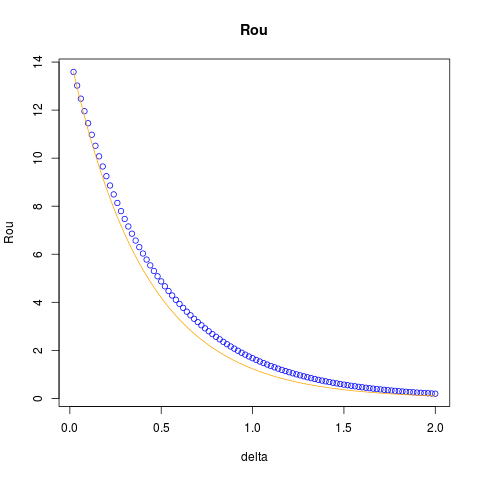

In [9]:
%%R
cat("count_total: ", count_total)
cat("count_limit_order: ", count_limit_order)

PL=count_limit_order/60/count_total
cat("PL: ", PL)

i=-30
Variance=0
for (count in 1:61)
{
    Variance= Variance+PL*i*i
    i=i+1
}
Variance=Variance/60/30
cat("Variance: ", Variance)

delta_go=sqrt(Variance/0.4)
cat("delta_go", delta_go)

Variance_DA=10/5/30
delta_DA=sqrt(Variance_DA/0.4)
cat("delta_DA: ", delta_DA)

rou_go <- function(delta)
{
    return (5*(exp(1-delta/delta_go)))
}
rou_DA <- function(delta)
{
    return (5*(exp(1-delta/delta_DA)))
}

delta=0
y_go<-array(1:100)
y_DA<-array(1:100)
i=1
for(count in 1:100){
y_go[i]=rou_go(delta)
y_DA[i]=rou_DA(delta)
delta=delta+0.02
i=i+1
}
x=0.02*(1:100)

plot(x,y_go,main="Rou",xlab="delta",ylab="Rou", col="blue", type="b")
lines(x,y_DA,col="orange")



### 5. (6 points)

Another of Mike and Farmer's observations is that the distribution of marketable as well as unmarketable limit orders as a function of distance $\Delta$ to the same-side best quote is well-described by a Student-$t$ distribution.  Assume $\mu=1/2$ as above.

(a) Derive an expression in terms of the Student-$t$ cumulative density function for the ratio of arrival rates of limit to market orders as a function of the spread $s$.  How does this ratio vary with $s$?

(b) Relative to the zero-intelligence model, does this empirically observed strategic behavior make the spread revert faster or more slowly?

### Solution:
(a)
$$f(x)=\frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu\,\pi}\,\Gamma(\frac{\nu}{2})}\,\frac{1}{\left(1+\frac{x^2}{\nu}\right)^{\frac{\nu+1}{2}}}\sim \frac{1}{s^{\nu+1}}\text{ as }$$
which is a power function of s


(b) In the ZI model, orders rates are constant. But here the orders rates are smaller as the spread goes up. So the revert will be faster.

### References

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-GO"><span class="mw-cite-backlink"><b><a href="#cite_ref-GO">^</a></b></span> Jim Gatheral and Roel C. A Oomen, Zero-intelligence realized variance estimation, <span>*Finance and Stochastics*,</span> <span>**14**</span>(2) 249–283, 2010.</li>

</ol>